# Evaluation Notebook

In [46]:
import pandas as pd
import HpTrainingFrame
from sklearn.metrics import roc_auc_score
from keras.models import model_from_json
from joblib import load
from HpMLUtils import FeatureDivider
from HpMLFeatureNormalisation import WeightedStandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [2]:
preregion = "INC_ge6jge4b"
preregion = "INC_ge6j3b"
preregion = "INC_5j3b"
region = preregion if "5j" not in preregion else "5j"
path = "/data/JulianGlatzer/HplusML/trainall/models/"
trainlabel = "train2mod0"
hpmass = 400

In [3]:
#load training
mpwss=load(path+'massparameterisedNN3_'+region+'_'+trainlabel+'_pipe.joblib')
json_file = open(path+'massparameterisedNN3_'+region+'_'+trainlabel+'_architecture.h5')
loaded_model_json = json_file.read()
json_file.close()
nnmpmodel = model_from_json(loaded_model_json)
nnmpmodel.load_weights(path+'massparameterisedNN3_'+region+'_'+trainlabel+'_weights.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [4]:
#load data
df_mc=pd.read_hdf('pandas_'+preregion+'.h5',preregion)
htf=HpTrainingFrame.HpTrainingFrame(df_mc)

In [9]:
df_mc.head()

,index,Mbb_MindR_70,eventNumber,Muu_MindR_70,nBTags_70,Centrality_all,pT_jet5,dRlepbb_MindR_70,H1_all,Mjjj_MaxPt,...,dRbb_avg_70,nJets,Mbb_MaxPt_70,HT_jets,weight,process,group,region,pT_jet1,hpmass
1781443,0,103940.882812,17024226,27210.330078,3,0.609507,27010.419922,2.894241,0.316001,354609.718750,...,1.880819,5,103940.882812,342291.75000,0.247991,ttlight,t#bar{t} + light,INC_5j3b,164560.875000,-1
1781444,1,53615.757812,22339383,66840.265625,3,0.580451,26526.646484,2.450003,0.542167,164463.000000,...,1.795886,5,53615.757812,274359.65625,0.264380,ttlight,t#bar{t} + light,INC_5j3b,117973.187500,-1
1781445,2,73202.921875,11831796,46704.871094,3,0.683466,31340.271484,2.250227,0.520357,128279.375000,...,2.241947,5,73202.921875,327823.84375,0.749577,ttlight,t#bar{t} + light,INC_5j3b,175158.359375,-1
1781446,3,71062.437500,28204469,517256.093750,3,0.244333,28123.253906,2.842810,0.543790,189395.453125,...,2.453748,5,71062.437500,247791.81250,0.294412,ttlight,t#bar{t} + light,INC_5j3b,94218.773438,-1
1781447,4,103107.429688,21034438,154225.515625,3,0.264006,28502.478516,2.055151,0.470699,307660.625000,...,1.971320,5,103107.429688,319510.06250,0.291157,ttlight,t#bar{t} + light,INC_5j3b,113043.484375,-1


In [14]:
X_train, X_test, X_eval, y_train, y_test,y_eval, w_train, w_test, w_eval=htf.prepare(hpmass=hpmass,region=preregion)
X_train.columns

Index(['nJets', 'nBTags_70', 'pT_jet1', 'Mbb_MindR_70', 'pT_jet5', 'H1_all',
       'dRbb_avg_70', 'dRlepbb_MindR_70', 'Muu_MindR_70', 'HT_jets',
       'Mbb_MaxPt_70', 'Mbb_MaxM_70', 'Mjjj_MaxPt', 'Centrality_all'],
      dtype='object')

In [15]:
X_train["hpmass"]=hpmass
X_train.head()

,nJets,nBTags_70,pT_jet1,Mbb_MindR_70,pT_jet5,H1_all,dRbb_avg_70,dRlepbb_MindR_70,Muu_MindR_70,HT_jets,Mbb_MaxPt_70,Mbb_MaxM_70,Mjjj_MaxPt,Centrality_all,hpmass
77024,5,3,104385.968750,49304.250000,25125.246094,0.007973,2.116647,2.320296,86836.531250,272762.18750,49304.250000,167983.921875,220209.953125,0.698610,400
184229,5,3,59077.847656,61942.574219,30219.337891,0.327436,1.594191,1.645456,52067.906250,207768.03125,76245.414062,111598.125000,147949.968750,0.702382,400
163210,5,3,113694.242188,97544.484375,29085.232422,0.175080,2.511786,1.900868,84639.359375,347335.87500,224209.406250,224209.406250,151341.062500,0.600052,400
93836,5,3,122872.890625,115727.046875,56363.449219,0.710759,2.251988,1.753078,62519.566406,405848.00000,115727.046875,117267.210938,187809.484375,0.458817,400
23021,5,3,84371.585938,175714.437500,29521.011719,0.359586,3.061575,1.851283,150516.140625,296834.25000,175714.437500,175714.437500,201326.015625,0.453366,400


In [16]:
print(mpwss.steps)
fd=mpwss.steps[3][1]
wss=mpwss.steps[4][1]
print (fd,wss)

[('msb', <HpMLWeightTransformer.MultiSBWeightsScaler object at 0x7f56dda4ee48>), ('scl', <HpMLWeightTransformer.WeightsMultiplier object at 0x7f56dda5e320>), ('aug', <HpMLMTL.HpMTLBackgroundAugmenter object at 0x7f56dda5e470>), ('fd', <HpMLUtils.FeatureDivider object at 0x7f56dda5e860>), ('wss', WeightedStandardScaler(copy=True, with_mean=True, with_std=True))]
<HpMLUtils.FeatureDivider object at 0x7f56dda5e860> WeightedStandardScaler(copy=True, with_mean=True, with_std=True)


In [17]:
X_tr, y_tr, w_tr = fd.transform(X_train,y_train,w_train)

In [18]:
X_tr.head()

,nJets,nBTags_70,pT_jet1,Mbb_MindR_70,pT_jet5,H1_all,dRbb_avg_70,dRlepbb_MindR_70,Muu_MindR_70,HT_jets,...,pT_jet5divhpmass,H1_alldivhpmass,dRbb_avg_70divhpmass,dRlepbb_MindR_70divhpmass,Muu_MindR_70divhpmass,HT_jetsdivhpmass,Mbb_MaxPt_70divhpmass,Mbb_MaxM_70divhpmass,Mjjj_MaxPtdivhpmass,Centrality_alldivhpmass
77024,5,3,104385.968750,49304.250000,25125.246094,0.007973,2.116647,2.320296,86836.531250,272762.18750,...,62.813115,0.000020,0.005292,0.005801,217.091328,681.905469,123.260625,419.959805,550.524883,0.001747
184229,5,3,59077.847656,61942.574219,30219.337891,0.327436,1.594191,1.645456,52067.906250,207768.03125,...,75.548345,0.000819,0.003985,0.004114,130.169766,519.420078,190.613535,278.995313,369.874922,0.001756
163210,5,3,113694.242188,97544.484375,29085.232422,0.175080,2.511786,1.900868,84639.359375,347335.87500,...,72.713081,0.000438,0.006279,0.004752,211.598398,868.339687,560.523516,560.523516,378.352656,0.001500
93836,5,3,122872.890625,115727.046875,56363.449219,0.710759,2.251988,1.753078,62519.566406,405848.00000,...,140.908623,0.001777,0.005630,0.004383,156.298916,1014.620000,289.317617,293.168027,469.523711,0.001147
23021,5,3,84371.585938,175714.437500,29521.011719,0.359586,3.061575,1.851283,150516.140625,296834.25000,...,73.802529,0.000899,0.007654,0.004628,376.290352,742.085625,439.286094,439.286094,503.315039,0.001133


In [19]:
X_tr, y_tr, w_tr = wss.transform(X_tr,y_tr,w_tr)

(166234, 27) [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]


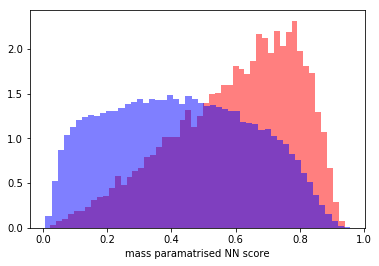

0.22263306796847082


In [21]:
bins =50
y_tr_pred = nnmpmodel.predict(X_tr).ravel()
plt.hist(y_tr_pred[y_tr>0.5].ravel(),alpha=0.5,color='r',bins=bins, density=True)
plt.hist(y_tr_pred[y_tr<0.5].ravel(),alpha=0.5,color='b',bins=bins, density=True)
plt.xlabel("mass paramatrised NN score")
plt.show()
print ( 1.-roc_auc_score(y_tr,y_tr_pred,sample_weight=w_tr))

# BDT stuff

In [40]:
#load training
bdtmpwss=load(path+'massparameterisedBDT_'+region+'_'+trainlabel+'_pipe.joblib')
bdtmpcl= load(path+'massparameterisedBDT_'+region+'_'+trainlabel+'_bdt.joblib')

In [41]:
bdtfd=bdtmpwss.steps[-1][1]

In [42]:
#load data
df_mc=pd.read_hdf('pandas_'+preregion+'.h5',preregion)
htf=HpTrainingFrame.HpTrainingFrame(df_mc)
X_train, X_test, X_eval, y_train, y_test,y_eval, w_train, w_test, w_eval=htf.prepare(hpmass=hpmass,region=preregion)
X_train["hpmass"]=hpmass
X_tr, y_tr, w_tr = bdtfd.transform(X_train,y_train,w_train)

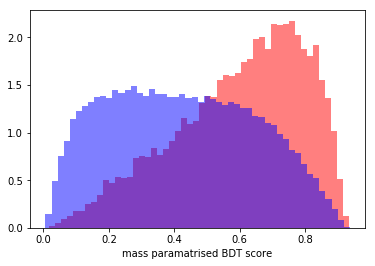

0.21764691841067174


In [49]:
y_tr_pred = bdtmpcl.predict_proba(X_tr)[:,1]
bins =50
plt.hist(y_tr_pred[y_tr>0.5].ravel(),alpha=0.5,color='r',bins=bins, density=True)
plt.hist(y_tr_pred[y_tr<0.5].ravel(),alpha=0.5,color='b',bins=bins, density=True)
plt.xlabel("mass paramatrised BDT score")
plt.show()
print ( 1.-roc_auc_score(y_tr,y_tr_pred,sample_weight=w_tr))